In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#load the data set
data=pd.read_csv("house_rent_Dataset.csv")

In [3]:
data.shape

(4746, 12)

In [4]:
data.sample()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
1100,2022-06-28,2,29500,700,2 out of 7,Carpet Area,Borivali West,Mumbai,Unfurnished,Bachelors/Family,2,Contact Agent


In [5]:
data.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [6]:
data.describe(include='object')

,Posted On,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Point of Contact
count,4746,4746,4746,4746,4746,4746,4746,4746
unique,81,480,3,2235,6,3,3,3
top,2022-07-06,1 out of 2,Super Area,Bandra West,Mumbai,Semi-Furnished,Bachelors/Family,Contact Owner
freq,311,379,2446,37,972,2251,3444,3216


In [7]:
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [8]:
data.duplicated().sum()

np.int64(0)

In [ ]:
#drop the columns not requires
#axis<1 means we are dropping columns
#axis>0 means we are dropping rows
data=data.drop(['Posted On','Floor','Area Locality'],axis=1)

In [14]:
data.columns

Index(['BHK', 'Rent', 'Size', 'Area Type', 'City', 'Furnishing Status',
       'Tenant Preferred', 'Bathroom', 'Point of Contact'],
      dtype='object')

<Axes: xlabel='Rent', ylabel='BHK'>

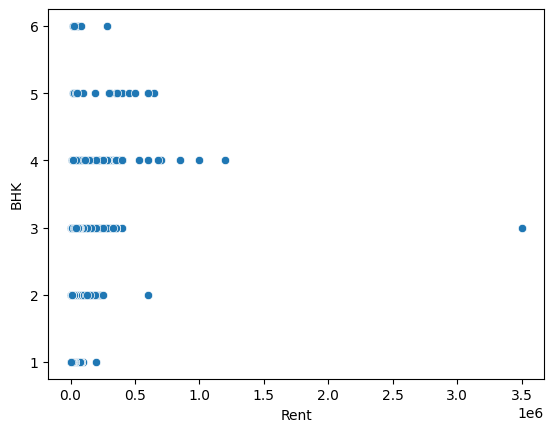

In [15]:
#scatterplot 
sns.scatterplot(x="Rent",y="BHK",data=data)

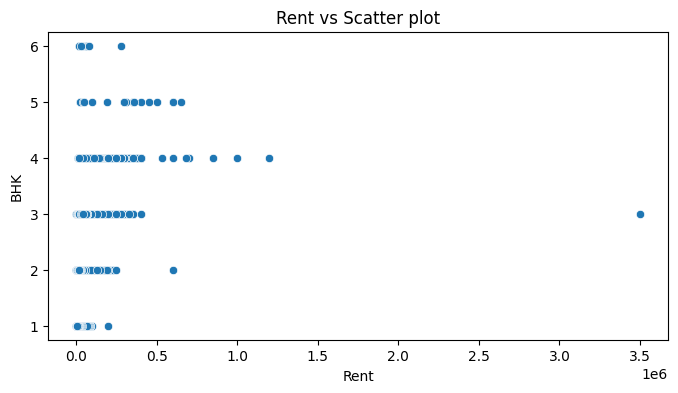

In [19]:
plt.figure(figsize=(8,4))
sns.scatterplot(x="Rent",y="BHK",data=data)
plt.title("Rent vs Scatter plot")
plt.show()

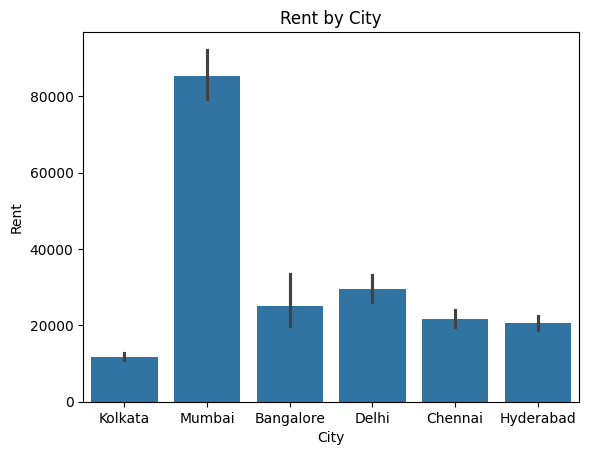

In [22]:
#rent by city
sns.barplot(x="City",y="Rent",data=data)
plt.title("Rent by City")
plt.show()

In [ ]:
sns.barplot(x="Tenant")

#Data Processing and Splitting

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [9]:
categorial_cols=data.select_dtypes(include=['object']).columns
categorial_cols

Index(['Posted On', 'Floor', 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Point of Contact'],
      dtype='object')

In [26]:
for col in categorial_cols:
    print(f"{col}:{data[col].unique()}")

Area Type:['Super Area' 'Carpet Area' 'Built Area']
City:['Kolkata' 'Mumbai' 'Bangalore' 'Delhi' 'Chennai' 'Hyderabad']
Furnishing Status:['Unfurnished' 'Semi-Furnished' 'Furnished']
Tenant Preferred:['Bachelors/Family' 'Bachelors' 'Family']
Point of Contact:['Contact Owner' 'Contact Agent' 'Contact Builder']


In [29]:
for col in categorial_cols:
    print(f"{col}:{data[col].nunique()}")  #unique()

Area Type:3
City:6
Furnishing Status:3
Tenant Preferred:3
Point of Contact:3


In [30]:
data.columns

Index(['BHK', 'Rent', 'Size', 'Area Type', 'City', 'Furnishing Status',
       'Tenant Preferred', 'Bathroom', 'Point of Contact'],
      dtype='object')

In [10]:
x=data.drop(columns="Rent")
y=data['Rent']

In [11]:
x.head()

,Posted On,BHK,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [40]:
y.head()

0    10000
1    20000
2    17000
3    10000
4     7500
Name: Rent, dtype: int64

In [13]:
# Use LeaveOneOutEncoder for encoding categorical variables
import category_encoders as ce
encoder = ce.LeaveOneOutEncoder(return_df=True)
x = encoder.fit_transform(x, y)

In [14]:
x.head()

,BHK,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,1100,18676.943967,11648.319312,22468.505513,31216.953238,2,16706.291757
1,2,800,18672.853988,11629.198853,38727.130222,31214.048795,1,16703.181337
2,2,1000,18674.080982,11634.934990,38728.463556,31214.920128,1,16704.114463
3,2,800,18676.943967,11648.319312,22468.505513,31216.953238,1,16706.291757
4,2,850,52405.438398,11653.099426,22469.883682,42185.583836,1,16707.069362


In [15]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
x=scalar.fit_transform(x)

In [16]:
x_df=pd.DataFrame(x)

In [17]:
x_df.head()

,0,1,2,3,4,5,6,7
0,0.2,0.136421,0.273162,0.004388,0.009553,0.017960,0.111111,0.003219
1,0.2,0.098874,0.273074,0.004130,0.487075,0.017809,0.000000,0.003165
2,0.2,0.123905,0.273100,0.004207,0.487114,0.017854,0.000000,0.003181
3,0.2,0.098874,0.273162,0.004388,0.009553,0.017960,0.000000,0.003219
4,0.2,0.105131,0.999941,0.004452,0.009593,0.587919,0.000000,0.003233


In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
x_train.shape,y_test.shape

((3796, 8), (950,))

In [24]:
x_test.shape,y_test.shape

((950, 8), (950,))

#Training Models and Evaluation of Linear Regression ,Random Forest,Decision Tree

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
model_rfr=RandomForestRegressor()
model_dt=DecisionTreeRegressor()
model_lr=LinearRegression()
models=[model_rfr,model_dt,model_lr]

In [ ]:
# Fitting data in all three models
model_names = ['Random Forest', 'Decision Tree', 'Linear Regression']
for name, model in zip(model_names, models):
    print(f"Training {name}")
    model.fit(x_train, y_train)

Training RandomForestRegressor()


ValueError: could not convert string to float: '2022-05-10'

In [ ]:
#checking the accuracy of all three models
for name, model in zip(model_names, models):
    print(f"Score of {name} is: {model.score(x_test, y_test)}")

NameError: name 'models' is not defined

In [16]:
new_data = pd.DataFrame({
    'BHK': [3],
    'Size': [1500],
    'Area Type': ['Super Area'],
    'City': ['Kolkata'],
    'Furnishing Status': ['Furnished'],
    'Tenant Preferred': ['Family'],
    'Bathroom': [2],
    'Point of Contact': ['Contact Owner']
})

new_data_encoded = encoder.transform(new_data)
new_data_scaled = scalar.transform(new_data_encoded)
predicted_rent = model_rfr.predict(new_data_scaled)
print(f"The predicted rent for the new data is: {predicted_rent[0]}")

NameError: name 'encoder' is not defined

#Deployment

In [15]:
import pickle

# save model
pickle.dump(model_rfr, open("rent_model.pkl", "wb"))

# save encoder
pickle.dump(encoder, open("encoder.pkl", "wb"))

# save scaler
pickle.dump(scalar, open("scaler.pkl", "wb"))

print("Model, encoder & scaler saved successfully")

NameError: name 'model_rfr' is not defined